### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Config

In [2]:
colors = {
    "DQN": 'darkorange',
    "REINFORCE": 'forestgreen',
    "CMA-ES": 'cyan',
    "ODT": 'blueviolet',
}

## Figure 5

### Loading data

In [3]:
raw_data = {
    "DQN": {
        "Training Duration": 24.17,
        "Reward": -64.13,
        "Emissions": 0.44,
        "Peak Traffic": 26,
        "Distance": 37.12,
        "Energy": 19.38
    },
    "ODT": {
        "Training Duration": 37.97,
        "Reward": -62.22,
        "Emissions": 2.24,
        "Peak Traffic": 26,
        "Distance": 36.61,
        "Energy": 19.22
    },
    "REINFORCE": {
        "Training Duration": 20.32,
        "Reward": -63.35,
        "Emissions": 0.35,
        "Peak Traffic": 25,
        "Distance": 36.88,
        "Energy": 19.38
    }
}

### Displaying figure

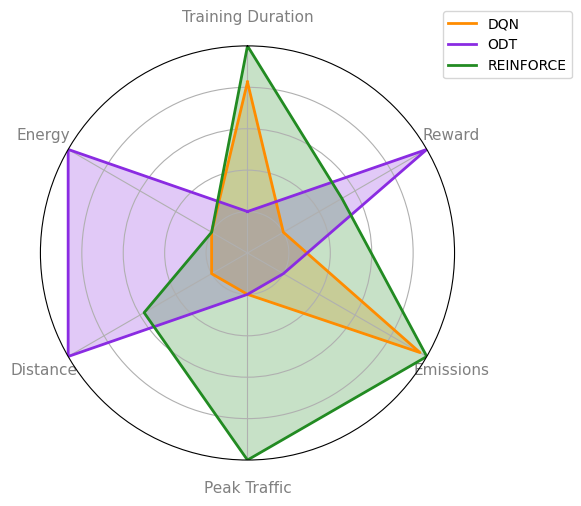

In [4]:
def scale_data_to_20_100(data, invert_metrics=None, feature_range=(20,100)):
    """
    Scale every metric in `data` to the range [20,100].
    If a metric name is in `invert_metrics`, we flip its min/max
    so that lower raw values become higher scaled scores.
    """
    # figure out which metrics exist
    features = list(next(iter(data.values())).keys())
    lower, upper = feature_range

    # compute raw mins & maxs
    mins = {f: min(d[f] for d in data.values()) for f in features}
    maxs = {f: max(d[f] for d in data.values()) for f in features}

    # by default, invert everything except Reward
    if invert_metrics is None:
        invert_metrics = [f for f in features if f != 'Reward']

    scaled = {}
    for alg, feats in data.items():
        scaled[alg] = {}
        for f, v in feats.items():
            # if this metric should be inverted, swap min & max
            if f in invert_metrics:
                min_v, max_v = maxs[f], mins[f]
            else:
                min_v, max_v = mins[f], maxs[f]

            # if no variation, put it in the middle
            if max_v == min_v:
                scaled_val = (lower + upper) / 2
            else:
                # standard min–max remap into [lower,upper]
                scaled_val = (v - min_v) / (max_v - min_v) * (upper - lower) + lower

            # numerical safety
            scaled_val = max(lower, min(upper, scaled_val))
            scaled[alg][f] = scaled_val

    return scaled

def make_fifa_radar(data, title=None):
    categories = list(next(iter(data.values())).keys())
    N = len(categories)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=11)
    ax.tick_params(axis='x', which='major', pad=10)
    plt.yticks([20,40,60,80], ["20","40","60","80"], color="none", size=9)
    plt.ylim(0,100)

    for alg, scores in data.items():
        vals = list(scores.values()) + [list(scores.values())[0]]
        c = colors.get(alg, 'grey')  # default to grey if missing
        ax.plot(angles, vals, color=c, linewidth=2, label=alg)
        ax.fill(angles, vals, color=c, alpha=0.25)

    if title:
        plt.title(title, size=15, y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.1))
    plt.tight_layout()

    plt.savefig('./figures/dm_profiles.png', dpi=300, bbox_inches='tight')

    plt.show()

scaled = scale_data_to_20_100(raw_data)

make_fifa_radar(scaled)